<P> <B> <font color=red size="4"> 2.Affinity Propagation</Font></B> </P>

Affinity Propagation is a clustering technique that doesn't require the number of clusters to be specified beforehand. Instead, it identifies clusters by exchanging messages between data points until a good set of exemplars (representative points) emerges.

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Display the results
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

In [19]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth

In [20]:
# Apply Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
y_affinity = affinity_propagation.fit_predict(X)

In [21]:
# Extract cluster centers and number of clusters
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

In [22]:
print(f"Number of clusters identified: {n_clusters}")

Number of clusters identified: 7


In [23]:
# Calculate Internal Metrics
silhouette_avg = silhouette_score(X, y_affinity)
davies_bouldin = davies_bouldin_score(X, y_affinity)
calinski_harabasz = calinski_harabasz_score(X, y_affinity)

In [24]:
# External Metrics: Compare with Ground Truth
adjusted_rand = adjusted_rand_score(y, y_affinity)
normalized_mutual_info = normalized_mutual_info_score(y, y_affinity)
homogeneity = homogeneity_score(y, y_affinity)
completeness = completeness_score(y, y_affinity)
v_measure = v_measure_score(y, y_affinity)

In [25]:
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.347408
1           Davies-Bouldin Index    0.985397
2        Calinski-Harabasz Index  443.797113
3            Adjusted Rand Index    0.481172
4  Normalized Mutual Information    0.669446
5                    Homogeneity    0.914941
6                   Completeness    0.527822
7                      V-Measure    0.669446


In [26]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

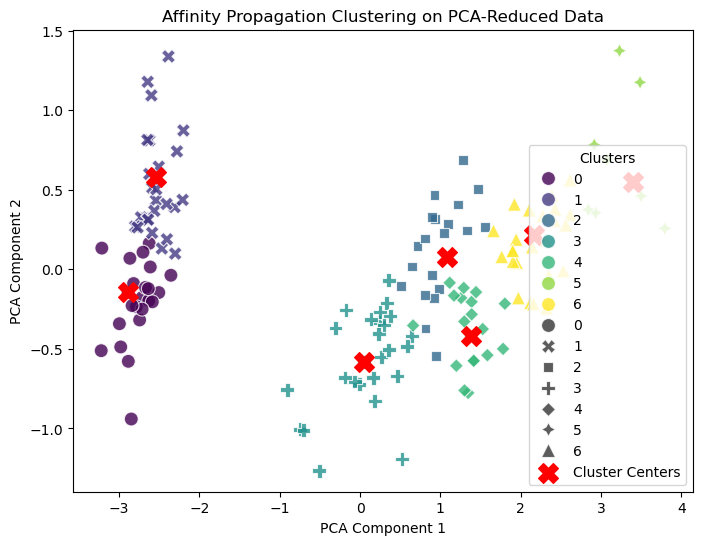

In [27]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_affinity, palette='viridis',
    style=y_affinity, s=100, alpha=0.8
)
plt.scatter(
    X_pca[cluster_centers_indices, 0],
    X_pca[cluster_centers_indices, 1],
    color='red', marker='X', s=200, label='Cluster Centers'
)
plt.title('Affinity Propagation Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()